In [1]:
import pandas as pd
import numpy as np

df = pd.read_parquet("additional_data/T100_data/t100_segment_data.parquet")
aircraft_types = pd.read_csv("additional_data/T100_data/L_AIRCRAFT_TYPE.csv")

In [2]:
challenge_data = pd.read_csv("data/challenge_set.csv")
submission_data = pd.read_csv("data/final_submission_set.csv")

challenge_data = pd.concat((challenge_data, submission_data))

In [3]:
aircraft_types.rename(columns={"Code": "AIRCRAFT_TYPE", "Description": "Aircraft_Name"}, inplace=True)
aircraft_types

,AIRCRAFT_TYPE,Aircraft_Name
0,7,Aero Commander 200
1,8,Aero Macchi AL-60
2,9,Aeronca 7-AC
3,10,Beech Bonanza 35A/C/D/E/G/H/J/K/S/V/ 36A
4,20,Bellanca CH-300
...,...,...
439,887,B787-800 Dreamliner
440,888,Boeing 737-900ER
441,889,B787-900 Dreamliner
442,890,Antonov 225 (6 Engine)


In [4]:
df = df.merge(aircraft_types)
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Aircraft_Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,456,1,2012,4,11,1,F,DU,Saab-Fairchild 340/B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,F,DU,Cessna C206/207/209/210 Stationair
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,L,DU,Cessna C206/207/209/210 Stationair
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,F,DU,Cessna C206/207/209/210 Stationair
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,L,DU,Cessna C206/207/209/210 Stationair


In [5]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG',
       'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS', 'DATA_SOURCE',
       'Aircraft_Name'],
      dtype='object')

In [6]:
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Aircraft_Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,456,1,2012,4,11,1,F,DU,Saab-Fairchild 340/B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,F,DU,Cessna C206/207/209/210 Stationair
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,L,DU,Cessna C206/207/209/210 Stationair
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,F,DU,Cessna C206/207/209/210 Stationair
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0,35,3,2012,4,11,1,L,DU,Cessna C206/207/209/210 Stationair


In [7]:
df["LOAD_FACTOR"] = df["PASSENGERS"] / df["SEATS"]
df = df[(df["DEPARTURES_PERFORMED"] > 0) &
        (df["DEPARTURES_SCHEDULED"] > 0) &
         (df["SEATS"] > 10) &
         (df["AIRCRAFT_CONFIG"] == 1) &
         (df["FREIGHT"] == 0) &
         (df["MAIL"] == 0) &
         (df["AIR_TIME"] > 0) &
         (df["RAMP_TO_RAMP"] > 0) &
         (df["DISTANCE"] > 0) & 
         (df["LOAD_FACTOR"] <= 1) &
         (df["LOAD_FACTOR"] > 0) &
         (df["DEPARTURES_PERFORMED"] <= df["DEPARTURES_SCHEDULED"])
]

<Axes: >

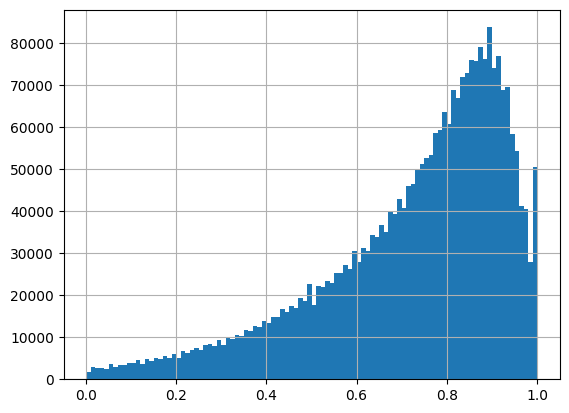

In [8]:
df["LOAD_FACTOR"].hist(bins=100)

In [9]:
challenge_data["aircraft_type"].unique()

array(['A320', 'B772', 'A333', 'B788', 'A21N', 'A20N', 'B738', 'B789',
       'A321', 'CRJ9', 'A319', 'B77W', 'BCS3', 'AT76', 'E190', 'B763',
       'BCS1', 'E195', 'B38M', 'B739', 'B737', 'A359', 'A332', 'B39M',
       'A343', 'A310', 'B752', 'B773', 'C56X', 'E290'], dtype=object)

In [10]:
mapping = {
    "A320": "Airbus Industrie A320-100/200",
    "B738": "Boeing 737-800",
    "B739": "Boeing 737-900",
    'B772': "Boeing 777-200ER/200LR/233LR",
    'A333': "Airbus Industrie A330-300/333",
    'B788': "B787-800 Dreamliner",
    'A21N': "Airbus Industrie A321-200n",
    'A20N': "Airbus Industrie A320-200n",
    'B789': "B787-900 Dreamliner",
    'A321': "Airbus Industrie A321/Lr",
    'CRJ9': "Canadair CRJ 900",
    'A319': "Airbus Industrie A319",
    'B77W': "Boeing 777-300/300ER/333ER",
    'BCS3': "A220-300 BD-500-1A11",
    'AT76': "Aerospatiale/Aeritalia ATR-72",
    'E190': "Embraer 190",
    'B763': "Boeing 767-300/300ER",
    'BCS1': "A200-100 BD-500-1A10",
    'E195': "Embraer EMB195",
    'B38M': "Boeing B737 Max 800",
    'B737': "Boeing 737-700/700LR/Max 7",
    'A359': "Airbus Industrie A350-900",
    'A332': "Airbus Industrie A330-200",
    'B39M': "Boeing B737 Max 900",
    'A343': "Airbus Industrie A340-300",
    'A310': "Airbus Industrie A310-300",
    'B752': "Boeing 757-200",
    'B773': "Boeing 777-300/300ER/333ER",
    'C56X': "Cessna Citation X Model 650/550B/550XL",
    'E290': "Embraer ERJ-175",  # Note: This is the closest match, as E290 is not explicitly listed in the provided data
}
name_to_icao = {v: k for k,v in mapping.items()}

df["Aircraft_ICAO"] = df["Aircraft_Name"].apply(lambda x: name_to_icao.get(x))
df = df[df["Aircraft_ICAO"].notna()]

In [11]:
df

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Aircraft_Name,LOAD_FACTOR,Aircraft_ICAO
13245,1.0,1.0,15200.0,76.0,15.0,0.0,0.0,930.0,158.0,139.0,...,1,2012,4,11,2,F,DU,Canadair CRJ 900,0.197368,CRJ9
13246,1.0,1.0,15200.0,76.0,22.0,0.0,0.0,411.0,84.0,67.0,...,1,2012,4,11,1,F,DU,Canadair CRJ 900,0.289474,CRJ9
13247,1.0,1.0,15200.0,76.0,25.0,0.0,0.0,874.0,149.0,125.0,...,1,2012,4,11,2,F,DU,Canadair CRJ 900,0.328947,CRJ9
13248,1.0,1.0,15200.0,76.0,30.0,0.0,0.0,569.0,105.0,92.0,...,1,2012,4,11,2,F,DU,Canadair CRJ 900,0.394737,CRJ9
13249,1.0,1.0,15200.0,76.0,32.0,0.0,0.0,569.0,111.0,87.0,...,1,2012,4,11,2,F,DU,Canadair CRJ 900,0.421053,CRJ9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12944426,197.0,194.0,2896350.0,12676.0,8473.0,0.0,0.0,96.0,9220.0,5345.0,...,1,2006,1,2,1,F,IU,Aerospatiale/Aeritalia ATR-72,0.668429,AT76
12944520,224.0,218.0,3254670.0,14236.0,7576.0,0.0,0.0,68.0,7955.0,4374.0,...,1,2006,1,2,1,F,DU,Aerospatiale/Aeritalia ATR-72,0.532172,AT76
12944521,224.0,218.0,3254730.0,14236.0,7259.0,0.0,0.0,68.0,9298.0,5388.0,...,1,2006,1,2,1,F,DU,Aerospatiale/Aeritalia ATR-72,0.509904,AT76
12944600,283.0,277.0,4105280.0,17948.0,12002.0,0.0,0.0,183.0,21308.0,14461.0,...,1,2006,1,2,1,F,IU,Aerospatiale/Aeritalia ATR-72,0.668710,AT76


In [12]:
for col in ["AIR_TIME", "DISTANCE", "SEATS", "RAMP_TO_RAMP", "PAYLOAD"]:
    df[col] = df[col] / df["DEPARTURES_PERFORMED"]

In [13]:
df = df[df["YEAR"] == 2022]

In [14]:
def get_top_values_per_column(df, n=3):
    """
    Get the n most common values and their frequencies for each column in a DataFrame.
    
    Parameters:
        df (pandas.DataFrame): Input DataFrame
        n (int): Number of top values to return (default: 3)
        
    Returns:
        dict: Dictionary where keys are column names and values are DataFrames 
             containing the top n values and their counts
    """
    results = {}
    
    for column in df.columns:
        # Get value counts for the column
        value_counts = df[column].value_counts()
        
        # Take top n values
        top_n = value_counts.head(n)
        
        # Create a DataFrame with value and count
        result_df = pd.DataFrame({
            'value': top_n.index,
            'count': top_n.values,
            'percentage': (top_n.values / len(df) * 100).round(2)
        })
        
        results[column] = result_df
    
    return results

get_top_values_per_column(df)

{'DEPARTURES_SCHEDULED':    value  count  percentage
 0    1.0  23372       17.95
 1    2.0  11060        8.50
 2    4.0   8528        6.55,
 'DEPARTURES_PERFORMED':    value  count  percentage
 0    1.0  23929       18.38
 1    2.0  11177        8.59
 2    4.0   8409        6.46,
 'PAYLOAD':      value  count  percentage
 0  37200.0  12703        9.76
 1  36400.0  10708        8.23
 2  21803.0   6536        5.02,
 'SEATS':    value  count  percentage
 0   76.0  19204       14.75
 1  186.0  13376       10.27
 2  182.0  11470        8.81,
 'PASSENGERS':    value  count  percentage
 0  142.0    312        0.24
 1  169.0    301        0.23
 2  172.0    300        0.23,
 'FREIGHT':    value   count  percentage
 0    0.0  130182       100.0,
 'MAIL':    value   count  percentage
 0    0.0  130182       100.0,
 'DISTANCE':    value  count  percentage
 0  177.0    108        0.08
 1  468.0     97        0.07
 2  236.0     95        0.07,
 'RAMP_TO_RAMP':    value  count  percentage
 0  150.0 

In [15]:
# almost all flights are in the US and prediction using specific airports would likely not transfer to our data  
relevant_cols = [
    # "PAYLOAD", # target
    #"ORIGIN",
    #"DEST",
    #"UNIQUE_CARRIER_NAME", 
    "Aircraft_ICAO",
    "AIR_TIME",
    "DISTANCE",
    "DISTANCE_GROUP",
    "SEATS",
    "MONTH",
    "QUARTER",
    "LOAD_FACTOR", # => Can vary later
    "PASSENGERS",
    "RAMP_TO_RAMP", #  - 2x taxiout?
]

df = df[relevant_cols]

In [16]:
# def filter_outliers(df, n=2):
#     return df[(df - df.mean()).abs() < n * df.std()]

# filter_cols = ["PAYLOAD", "AIR_TIME", "RAMP_TO_RAMP", "DISTANCE", "SEATS"]
# min_max = {}
# for col in filter_cols:
#     filtered = filter_outliers(df[col])
#     min_max[col] = [filtered.min(), filtered.max()]

# for col, (min, max) in min_max.items():
#     df = df[(df[col] >= min) & (df[col] <= max)]

In [17]:
len(df)

130182

In [18]:
df.to_csv("t100_pax_predictor.csv")

<Axes: >

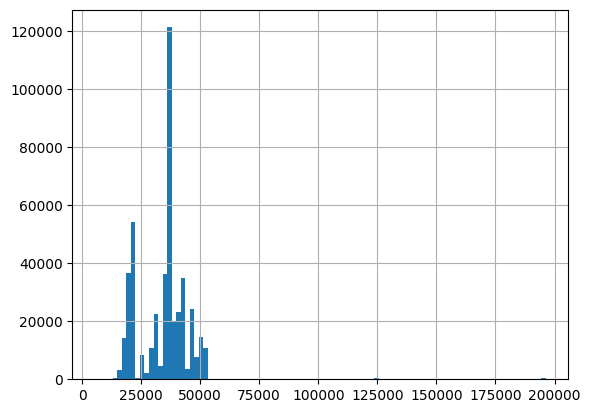

In [19]:
# We now add additional data we can get from our preprocessors
from typing import List
from preprocessing.base_preprocessor import BasePreprocessor
from preprocessing.aircraft_performance import AircraftPerformancePreprocessor
from preprocessing.fuel_price_preprocessor import FuelPricePreprocessor
from preprocessing.runway import RunwayInfoPreprocessor
from preprocessing.pax_flow_preprocessor import PaxFlowPreprocessor
from preprocessing.weather import WeatherDataPreprocessor
from preprocessing.derived_features import DerivedFeaturePreprocessor
from preprocessing.airport_preprocessor import AirportPreprocessor
from preprocessing.payload_prediction_preprocessor import PayloadPredictionPreprocessor
from utils.dataset import Dataset

preprocessors: List[BasePreprocessor] = [
    AirportPreprocessor(compute_timezone_features=False),
    RunwayInfoPreprocessor(),
    AircraftPerformancePreprocessor(use_airline_lut=False),
    # DerivedFeaturePreprocessor(),
]

/home/wues_ni/miniconda3/envs/atow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
df.rename(columns={"ORIGIN": "adep", "DEST": "ades", "UNIQUE_CARRIER_NAME": "airline", "Aircraft_ICAO": "aircraft_type"}, inplace=True)
ds = Dataset(df)
for p in preprocessors:
    ds = p.process(ds)

ds.df.head()

Adding airport features


100%|██████████| 458627/458627 [00:06<00:00, 70588.46it/s]


Done.
Adding runway data...


100%|██████████| 458627/458627 [00:04<00:00, 94917.32it/s] 


Done.
No specific AT76 found for N/A


 31%|███       | 143163/458627 [00:00<00:00, 1431624.54it/s]

No specific CRJ9 found for N/A
No specific E290 found for N/A
No specific E290 found for N/A
No specific CRJ9 found for N/A
No specific E290 found for N/A
No specific CRJ9 found for N/A
No specific CRJ9 found for N/A
No specific E290 found for N/A
No specific B737 found for N/A
No specific CRJ9 found for N/A
No specific A319 found for N/A
No specific E190 found for N/A
No specific E195 found for N/A
No specific A320 found for N/A
No specific E190 found for N/A
No specific BCS1 found for N/A
No specific A319 found for N/A
No specific A319 found for N/A
No specific B737 found for N/A
No specific B738 found for N/A
No specific B739 found for N/A
No specific B39M found for N/A
No specific A319 found for N/A
No specific B737 found for N/A
No specific BCS3 found for N/A
No specific B737 found for N/A
No specific A320 found for N/A
No specific A319 found for N/A
No specific B737 found for N/A
No specific A320 found for N/A
No specific BCS3 found for N/A
No specific A320 found for N/A
No speci

100%|██████████| 458627/458627 [00:00<00:00, 1325194.86it/s]


,PAYLOAD,adep,ades,airline,aircraft_type,AIR_TIME,DISTANCE,DISTANCE_GROUP,SEATS,MONTH,...,Cargo Capacity,Range(nm),MLW,MTOW,ZFW,Fuel Capacity,Fuel Flow,Service Ceiling(ft),Cruising Speed(mach),Cost Index
430097,16645.0,FLL,EYW,Silver Airways,AT76,45.0,145.0,1,70.0,6,...,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,15
430098,16645.0,EYW,FLL,Silver Airways,AT76,37.0,145.0,1,70.0,6,...,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,15
430099,16645.0,TPA,FLL,Silver Airways,AT76,54.0,197.0,1,70.0,6,...,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,15
430100,16645.0,MHH,FLL,Silver Airways,AT76,47.0,193.0,1,70.0,6,...,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,15
430101,16645.0,FLL,MHH,Silver Airways,AT76,48.0,193.0,1,70.0,6,...,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,15


In [1]:
df["Seats Total"] = df["SEATS"]
df = df.drop(columns=["PAYLOAD", "airline_aircraft", "SEATS", 'Seats First_Class', 'Seats First_Class_Suite', 'Seats Business_Class', 'Seats Economy_Comfort_Class', 'Seats Economy_Family_Couch', 'Seats Premium_Economy_Class', 'Seats Economy_Class', "Cost Index"])
df = df.drop(columns=["adep_city", "ades_city", "adep_region", "ades_region", "adep_continent", "ades_continent", "adep_lat", "adep_lon", "ades_lat", "ades_lon", "adep_tz", "ades_tz"])
df.head()


NameError: name 'df' is not defined

<Axes: >

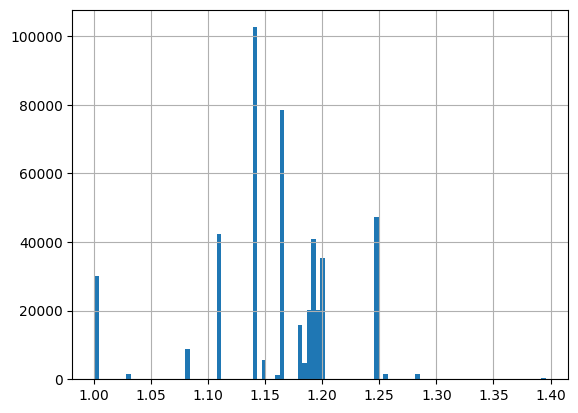

In [21]:
pd.set_option("display.max_columns", 100)
# (df["openap_mtow"] / df["openap_mlw"]).hist(bins=100)
# df[df["MTOW"] / df["MLW"] < 1.1]["aircraft_type"].unique()

AT76


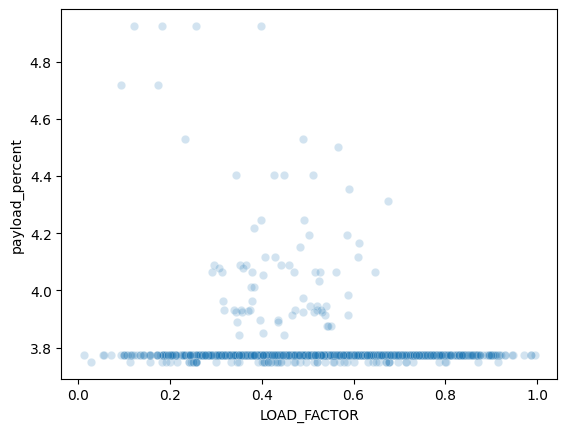

CRJ9


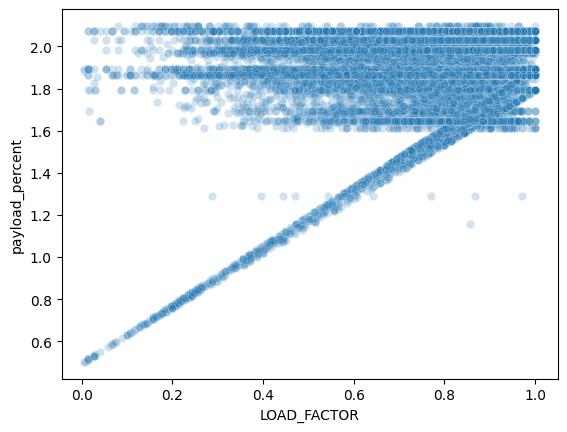

E290


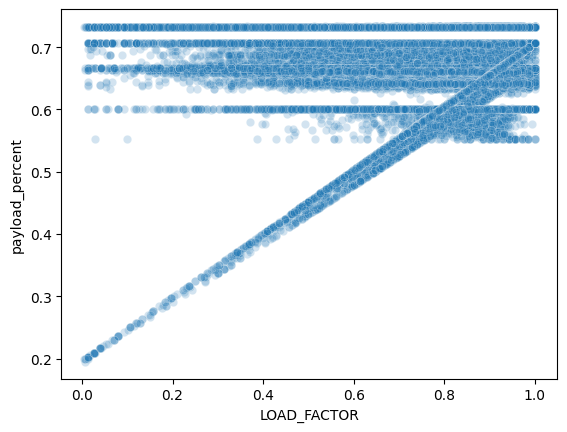

B737


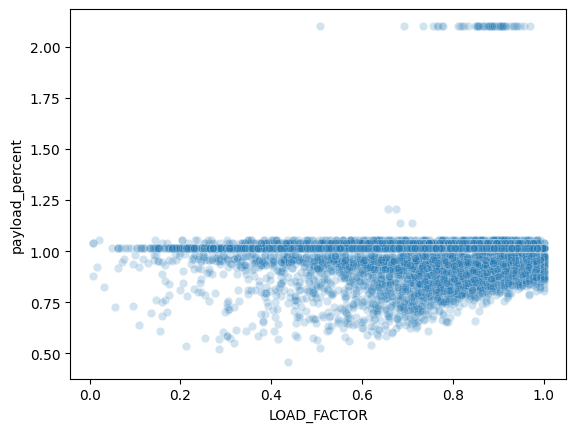

A319


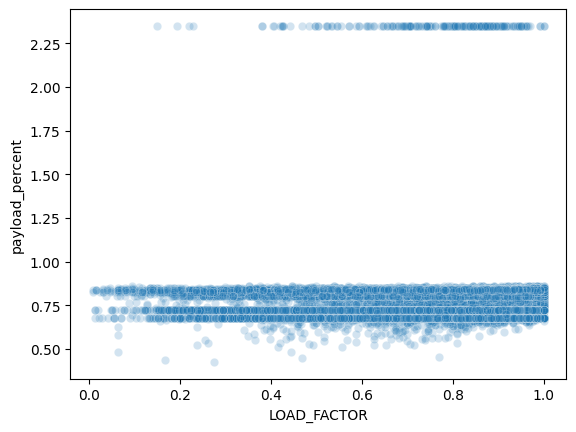

E190


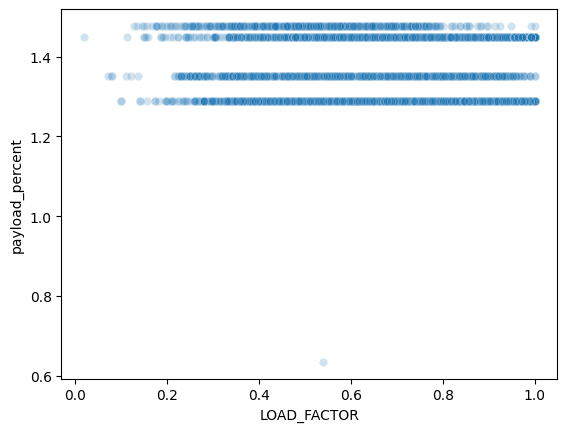

E195


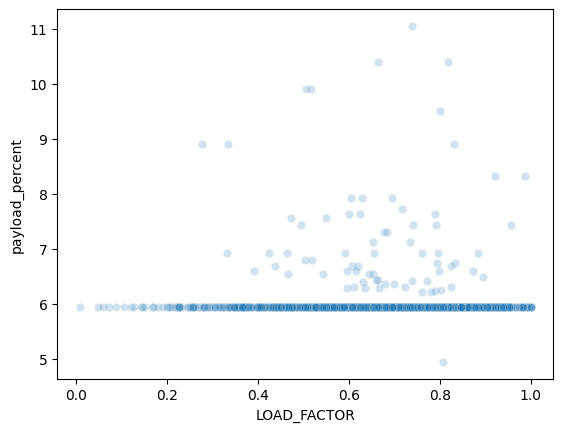

A320


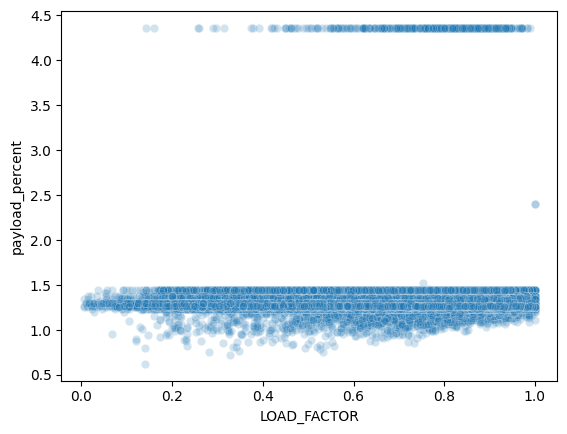

BCS1


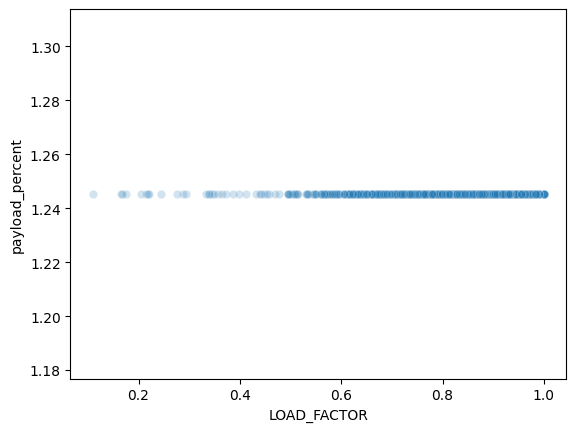

B738


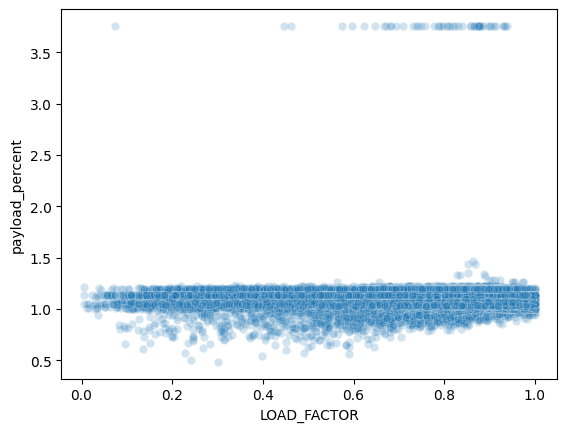

B739


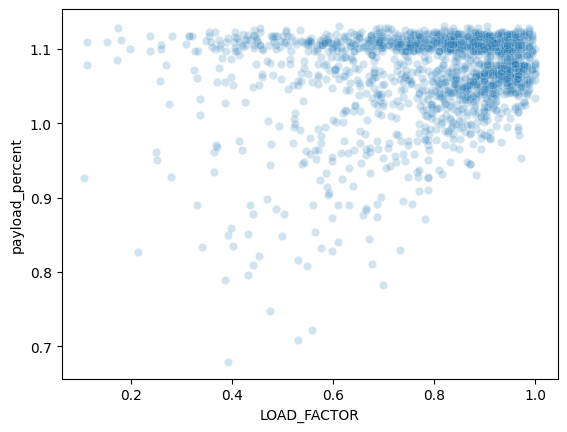

B39M


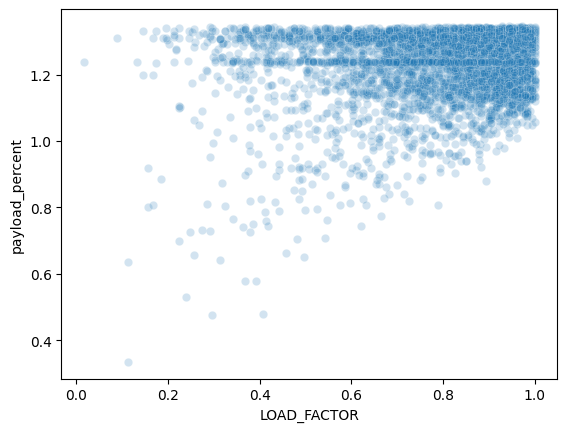

BCS3


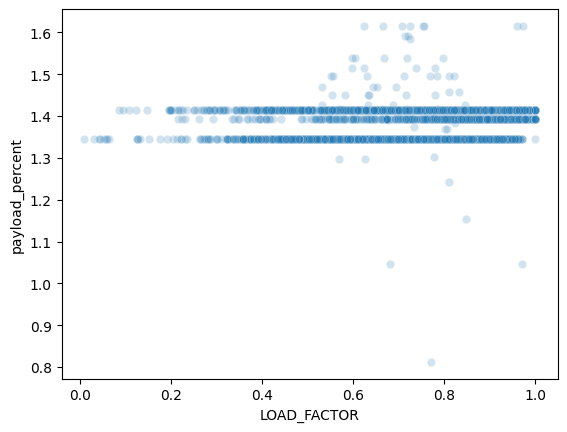

A20N


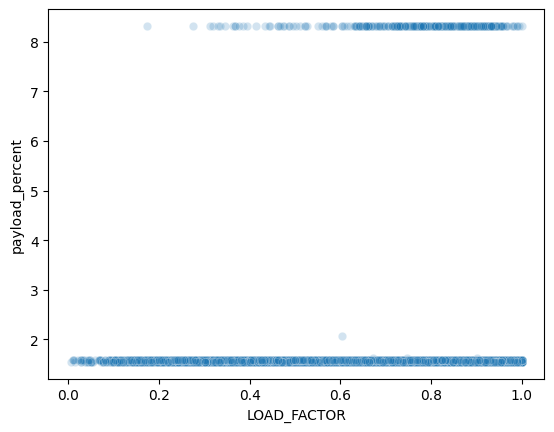

B38M


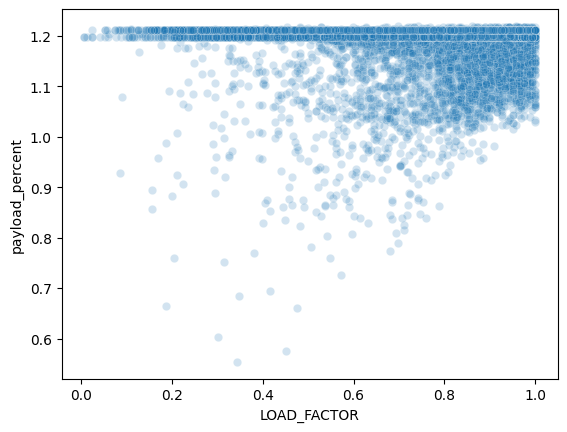

B752


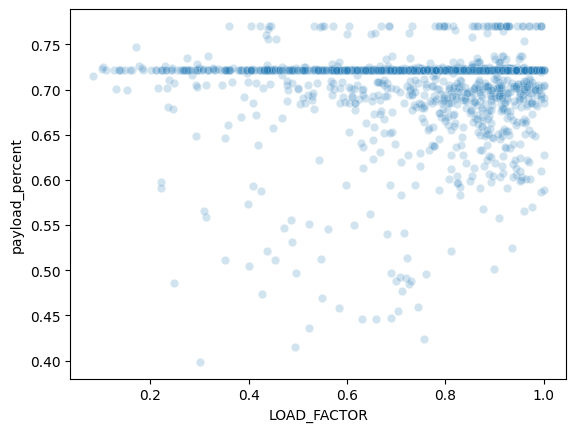

A321


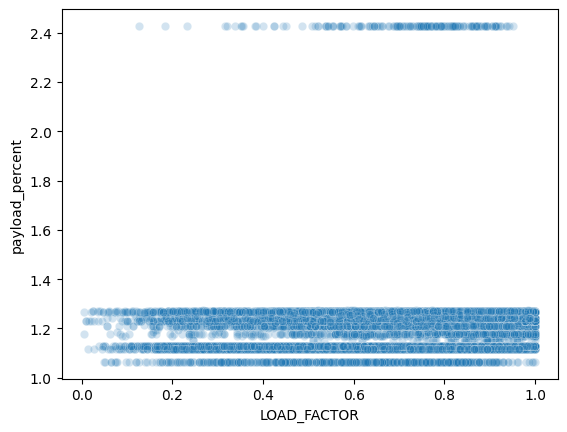

A21N


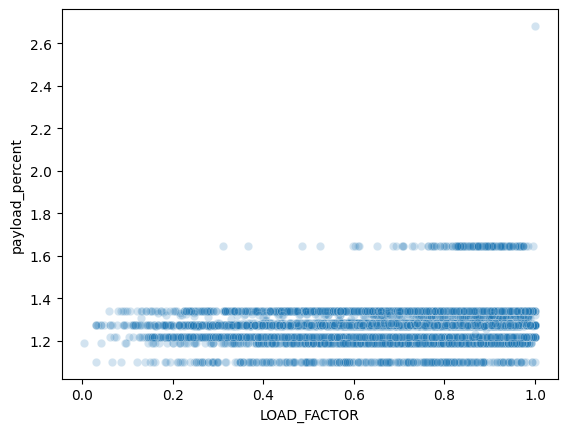

B763


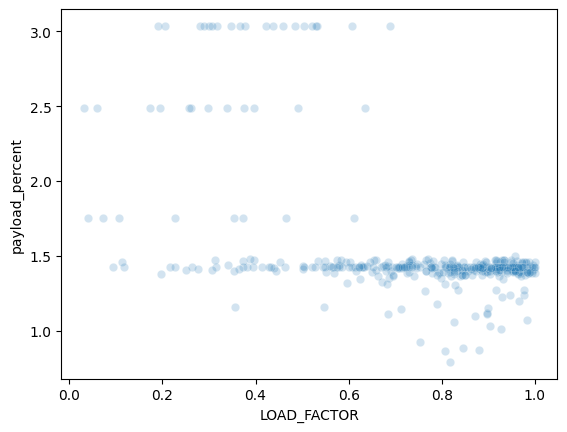

B772


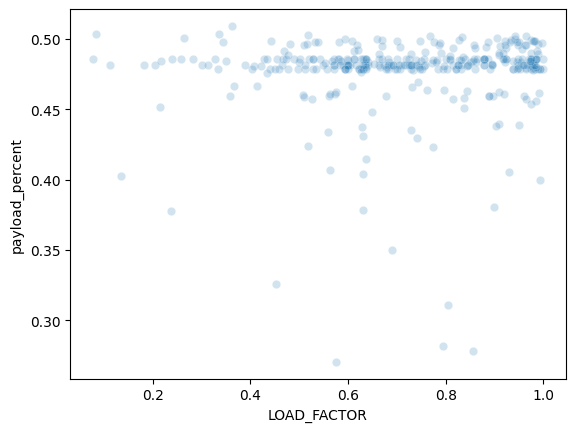

B788


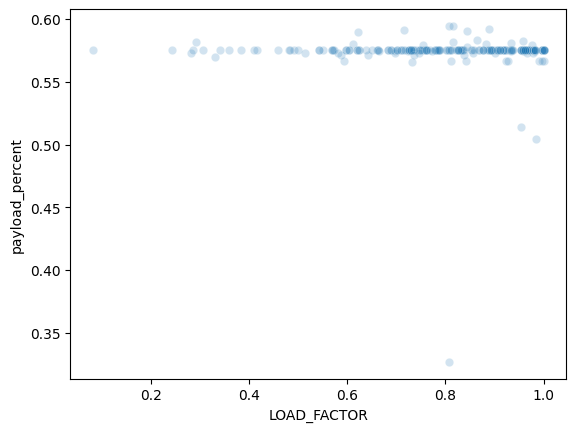

A332


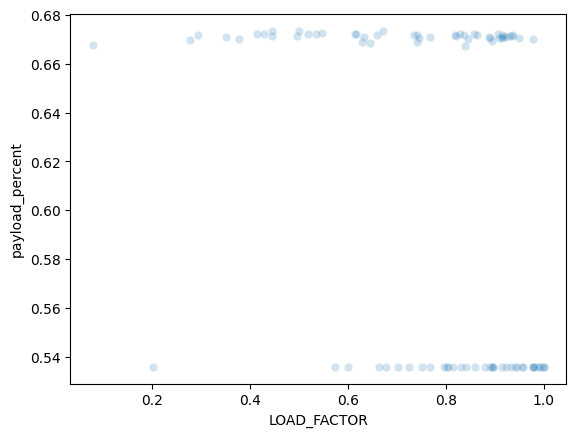

B789


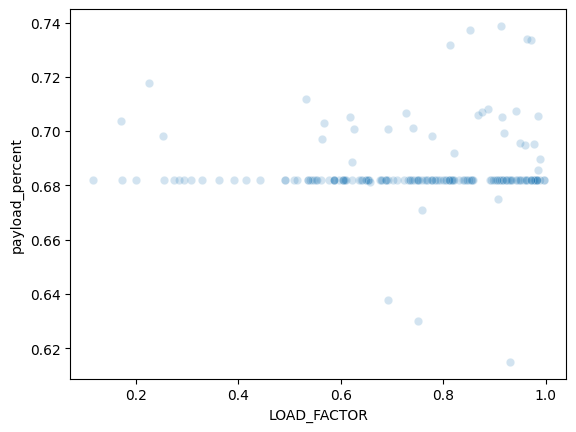

A333


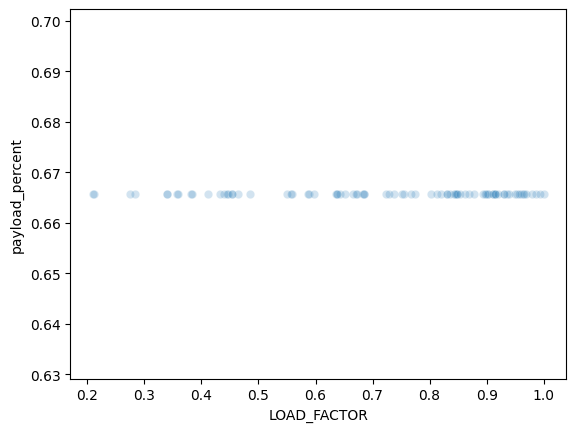

A359


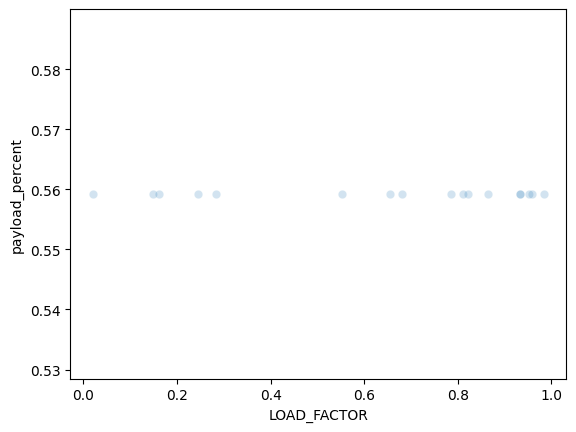

B773


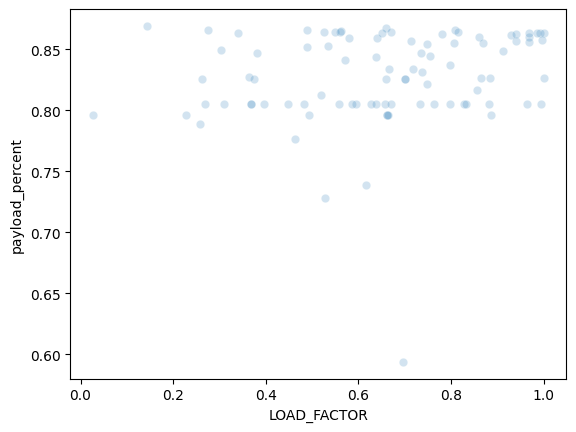

In [22]:
# df["payload_kg"] = df["PAYLOAD"] * 0.453592
# df["max_payload_kg"] = df["MTOW"] - df["ZFW"]
# df["payload_percent"] = df["payload_kg"] / df["max_payload_kg"]

# import matplotlib.pyplot as plt
# import seaborn as sns

# for ac_type in df["aircraft_type"].unique():
#     print(ac_type)
#     dd = df[df["aircraft_type"] == ac_type]
#     sns.scatterplot(dd, x="LOAD_FACTOR", y="payload_percent", alpha=0.2)
#     plt.show()

# (df[df["Aircraft_ICAO"] == "A320"]["PAYLOAD"] * 0.453592).hist(bins=100)


In [23]:
df["tow"] = df["ZFW"] + (df["PAYLOAD"] * 0.453592)

<Axes: >

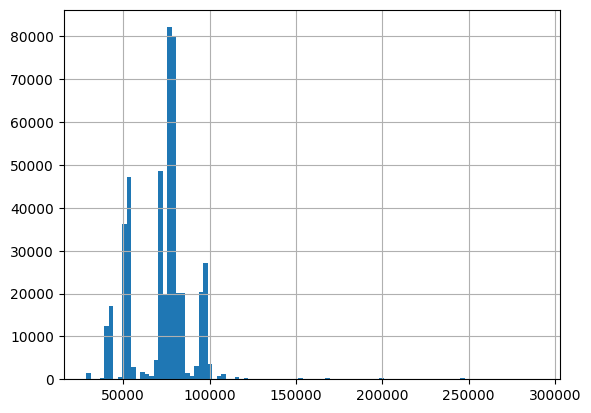

In [24]:
df["tow"].hist(bins=100)

In [25]:
df["Seats Total"] = df["SEATS"]
df = df.drop(columns=["PAYLOAD", "airline_aircraft", "SEATS", 'Seats First_Class', 'Seats First_Class_Suite', 'Seats Business_Class', 'Seats Economy_Comfort_Class', 'Seats Economy_Family_Couch', 'Seats Premium_Economy_Class', 'Seats Economy_Class', "Cost Index"])
df = df.drop(columns=["adep_city", "ades_city", "adep_region", "ades_region", "adep_continent", "ades_continent", "adep_lat", "adep_lon", "ades_lat", "ades_lon", "adep_tz", "ades_tz"])

df.head()

,adep,ades,airline,aircraft_type,AIR_TIME,DISTANCE,DISTANCE_GROUP,MONTH,QUARTER,LOAD_FACTOR,RAMP_TO_RAMP,adep_type,ades_type,adep_elevation,ades_elevation,route_distance_km,route_distance_mi,runway_ades_length_ft,runway_ades_he_elevation_ft,runway_ades_le_elevation_ft,runway_ades_he_displaced_threshold_ft,runway_ades_le_displaced_threshold_ft,runway_adep_length_ft,runway_adep_he_elevation_ft,runway_adep_le_elevation_ft,runway_adep_he_displaced_threshold_ft,runway_adep_le_displaced_threshold_ft,Seats Total,Cargo Capacity,Range(nm),MLW,MTOW,ZFW,Fuel Capacity,Fuel Flow,Service Ceiling(ft),Cruising Speed(mach),payload_kg,max_payload_kg,payload_percent,tow
430097,FLL,EYW,Silver Airways,AT76,45.0,145.0,1,6,2,0.257143,70.0,large_airport,medium_airport,9.0,3.0,233.235385,144.926110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,7550.03884,2000.0,3.775019,28550.03884
430098,EYW,FLL,Silver Airways,AT76,37.0,145.0,1,6,2,0.485714,56.0,medium_airport,large_airport,3.0,9.0,233.235385,144.926110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,7550.03884,2000.0,3.775019,28550.03884
430099,TPA,FLL,Silver Airways,AT76,54.0,197.0,1,6,2,0.742857,77.0,large_airport,large_airport,26.0,9.0,316.621640,196.740055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,7550.03884,2000.0,3.775019,28550.03884
430100,MHH,FLL,Silver Airways,AT76,47.0,193.0,1,6,2,0.757143,65.0,medium_airport,large_airport,6.0,9.0,310.254715,192.783821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,7550.03884,2000.0,3.775019,28550.03884
430101,FLL,MHH,Silver Airways,AT76,48.0,193.0,1,6,2,0.871429,66.0,large_airport,medium_airport,9.0,6.0,310.254715,192.783821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,450.0,740.0,22350.0,23000.0,21000.0,5000.0,650.0,25000.0,0.5,7550.03884,2000.0,3.775019,28550.03884


In [26]:
# df.to_parquet("additional_data/T100_data/dataset.parquet")

<Axes: >

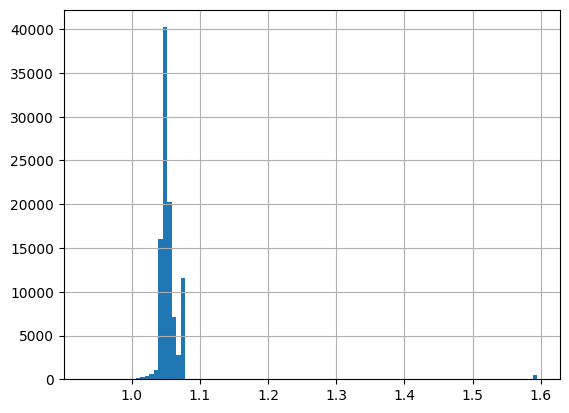

In [27]:
a320 = df[df["aircraft_type"] == "A320"]
(a320["tow"] / a320["MTOW"]).hist(bins=100)

In [28]:
#a320["PAYLOAD"]